# Project Topic - Wine Clustering  

# Importing Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

In [8]:
# For Ignoring Warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading Dataset

In [10]:
path = r'/content/drive/MyDrive/wine-clustering.csv'
ds = pd.read_csv(path)

# Data Cleaning

In [11]:
ds.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

# Normalization of data

In [12]:
ds.min()

Alcohol                  11.03
Malic_Acid                0.74
Ash                       1.36
Ash_Alcanity             10.60
Magnesium                70.00
Total_Phenols             0.98
Flavanoids                0.34
Nonflavanoid_Phenols      0.13
Proanthocyanins           0.41
Color_Intensity           1.28
Hue                       0.48
OD280                     1.27
Proline                 278.00
dtype: float64

In [13]:
ds.max()

Alcohol                   14.83
Malic_Acid                 5.80
Ash                        3.23
Ash_Alcanity              30.00
Magnesium                162.00
Total_Phenols              3.88
Flavanoids                 5.08
Nonflavanoid_Phenols       0.66
Proanthocyanins            3.58
Color_Intensity           13.00
Hue                        1.71
OD280                      4.00
Proline                 1680.00
dtype: float64

In [14]:
ds.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [15]:
ds.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [16]:
ds = (ds - ds.min()) / (ds.max() - ds.min())
ds.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [17]:
ds.describe

<bound method NDFrame.describe of       Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    0.842105    0.191700  0.572193      0.257732   0.619565       0.627586   
1    0.571053    0.205534  0.417112      0.030928   0.326087       0.575862   
2    0.560526    0.320158  0.700535      0.412371   0.336957       0.627586   
3    0.878947    0.239130  0.609626      0.319588   0.467391       0.989655   
4    0.581579    0.365613  0.807487      0.536082   0.521739       0.627586   
..        ...         ...       ...           ...        ...            ...   
173  0.705263    0.970356  0.582888      0.510309   0.271739       0.241379   
174  0.623684    0.626482  0.598930      0.639175   0.347826       0.282759   
175  0.589474    0.699605  0.481283      0.484536   0.543478       0.210345   
176  0.563158    0.365613  0.540107      0.484536   0.543478       0.231034   
177  0.815789    0.664032  0.737968      0.716495   0.282609       0.368966   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0      0.573840              0.283019         0.593060         0.372014   
1      0.510549              0.245283         0.274448         0.264505   
2      0.611814              0.320755         0.757098         0.375427   
3      0.664557              0.207547         0.558360         0.556314   
4      0.495781              0.490566         0.444795         0.259386   
..          ...                   ...              ...              ...   
173    0.056962              0.735849         0.205047         0.547782   
174    0.086498              0.566038         0.315457         0.513652   
175    0.073840              0.566038         0.296530         0.761092   
176    0.071730              0.754717         0.331230         0.684300   
177    0.088608              0.811321         0.296530         0.675768   

          Hue     OD280   Proline  
0    0.455285  0.970696  0.561341  
1    0.463415  0.780220  0.550642  
2    0.447154  0.695971  0.646933  
3    0.308943  0.798535  0.857347  
4    0.455285  0.608059  0.325963  
..        ...       ...       ...  
173  0.130081  0.172161  0.329529  
174  0.178862  0.106227  0.336662  
175  0.089431  0.106227  0.397290  
176  0.097561  0.128205  0.400856  
177  0.105691  0.120879  0.201141  

[178 rows x 13 columns]>

In [18]:
ds.shape

(178, 13)

In [19]:
ds.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium               float64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                 float64
dtype: object

array([[<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic_Acid'}>,
        <Axes: title={'center': 'Ash'}>,
        <Axes: title={'center': 'Ash_Alcanity'}>],
       [<Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Total_Phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>,
        <Axes: title={'center': 'Nonflavanoid_Phenols'}>],
       [<Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color_Intensity'}>,
        <Axes: title={'center': 'Hue'}>,
        <Axes: title={'center': 'OD280'}>],
       [<Axes: title={'center': 'Proline'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

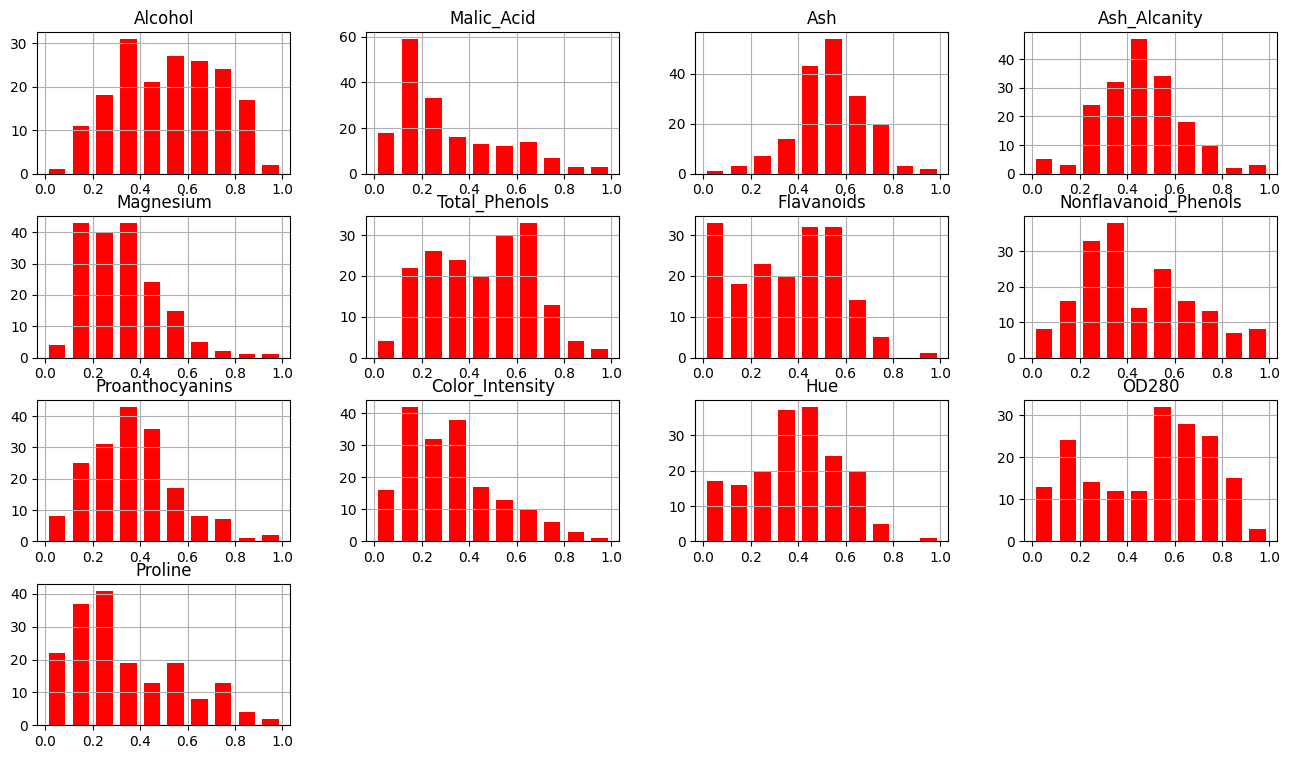

In [20]:

#making Histogram for each attribute

#create histogram for each column in DataFrame

ds.hist(rwidth = 0.7,figsize=(16,9),label=5,color='r')


<Axes: >

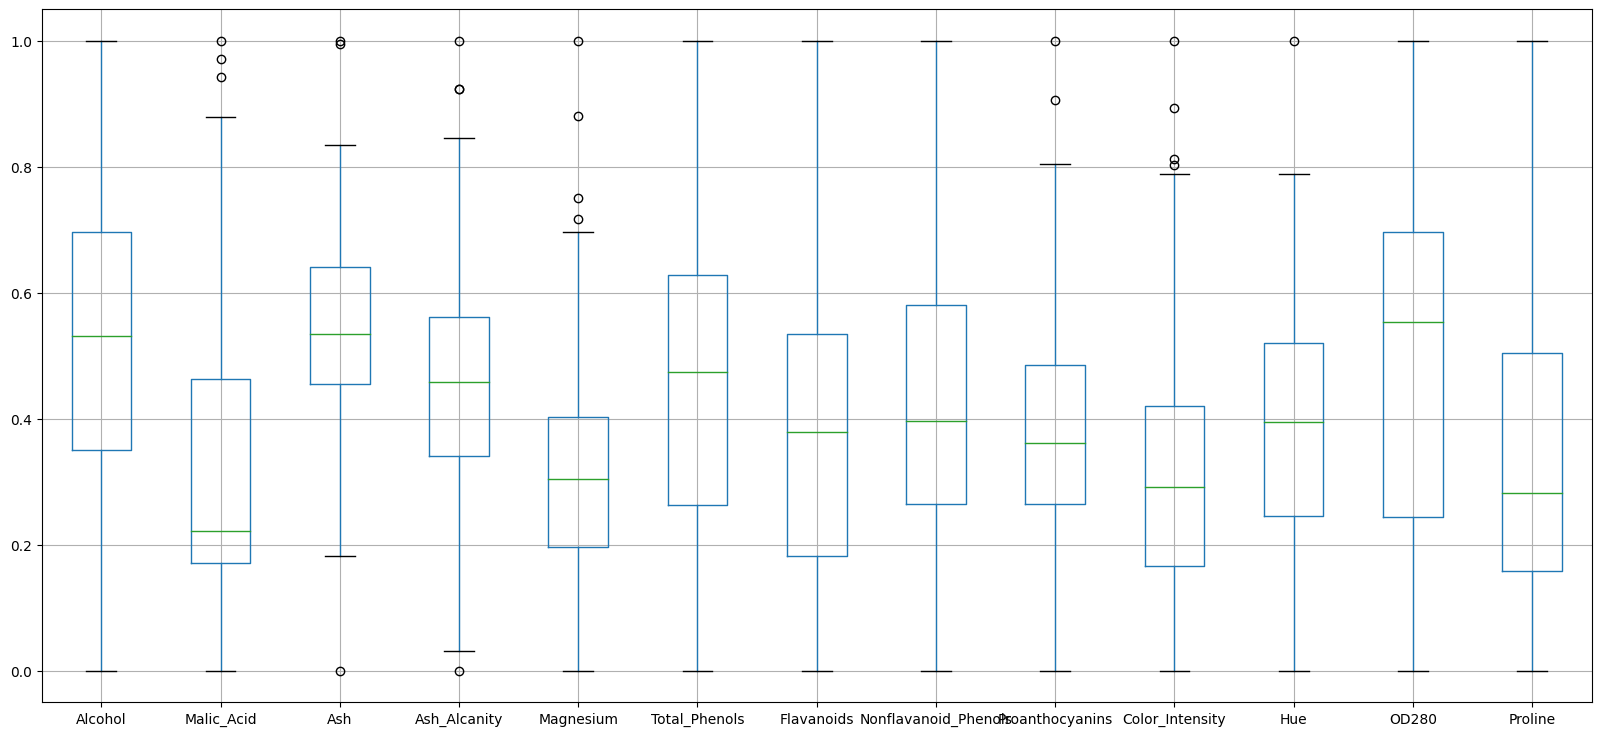

In [21]:
ds.boxplot(widths=0.5,figsize=(20,9))

# Data Analysis

In [22]:
ds.describe().loc[['min', 'max', 'mean', 'std']].round(2)



,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
mean,0.52,0.32,0.54,0.46,0.32,0.45,0.36,0.44,0.37,0.32,0.39,0.49,0.33
std,0.21,0.22,0.15,0.17,0.16,0.22,0.21,0.23,0.18,0.20,0.19,0.26,0.22


In [23]:
# Normalization
display(ds)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


# Applying Kmeans

In [24]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

features =scaler.fit(ds)
features =features.transform(ds)

# Convert to pandas Dataframe
scaled_ds =pd.DataFrame(features,columns=ds.columns)
# Print the scaled data
scaled_ds.head(2)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242


In [25]:
X=scaled_ds.values

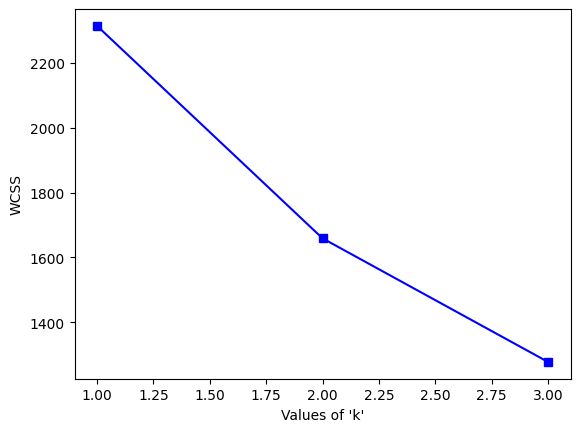

In [26]:
# Elbow Method
# The elbow Method is used to determine the number of clusters
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
wcss = {}
for i in range(1, 4):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss[i] = kmeans.inertia_

plt.plot(wcss.keys(), wcss.values(), 'bs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

In [27]:
KMeans(n_clusters=3)

KMeans(n_clusters=3)

In [28]:
kmeans.cluster_centers_

array([[ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529]])

In [29]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [30]:
pca=PCA(n_components=2)

reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])

#Reduced Features
reduced_X.head()

,PCA1,PCA2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [31]:

centers=pca.transform(kmeans.cluster_centers_)



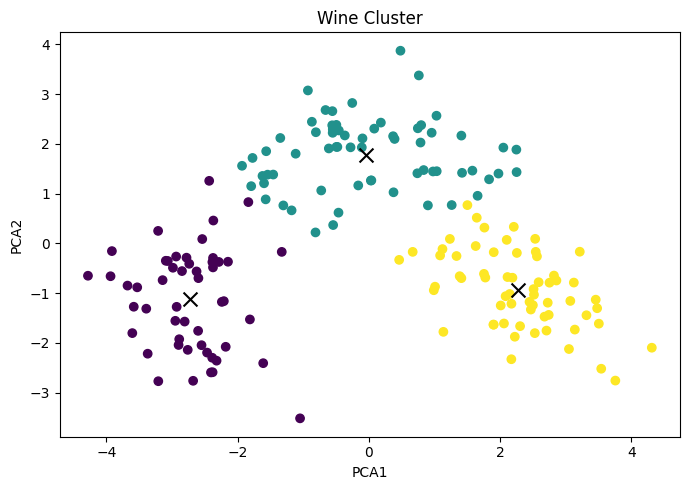

In [32]:
plt.figure(figsize=(7,5))

# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='Black')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()

In [33]:
from sklearn.cluster import KMeans
import time

# Generate some example data
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=178, n_features=13, centers=3, random_state=0)

# Initialize and configure the KMeans algorithm
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)

# Measure the execution time
start_time = time.time()
kmeans.fit(X)
end_time = time.time()

execution_time2 = end_time - start_time
print(f"Execution time: {execution_time2} seconds")


Execution time: 0.022603750228881836 seconds


In [64]:
from sklearn.cluster import KMeans
import time

# Generate some example data
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=178, n_features=13, centers=3, random_state=0)

# Initialize and configure the KMeans algorithm
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)

# Measure the execution time
start_time = time.time()
kmeans.fit(X)
end_time = time.time()

accuracy2 = end_time - start_time
print(f"accuracy time: {accuracy2} seconds")

accuracy time: 0.01747727394104004 seconds


# Gaussian Mixture Model

In [34]:
train = ds.sample(frac =.9, random_state=0)
val = ds.drop(train.index)
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]

x_val = val.iloc[:,:-1]
y_val = val.iloc[:,-1]

x_train.shape,y_train.shape, x_val.shape, y_val.shape


((160, 12), (160,), (18, 12), (18,))

In [35]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, random_state=0).fit(x_train)


In [36]:
predictions = gm.predict(x_train)
predictions

array([2, 1, 0, 2, 0, 2, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 2, 2, 2, 1, 0, 0, 1, 2, 2, 0, 0,
       0, 2, 1, 0, 1, 2, 1, 1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 2, 0, 1, 0, 0,
       1, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 0,
       1, 2, 1, 1, 2, 2, 0, 1, 2, 2, 0, 0, 2, 2, 0, 1, 2, 2, 0, 1, 2, 0,
       1, 1, 2, 2, 1, 2, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 1, 1, 2, 0, 0,
       0, 0, 1, 1, 0, 0])

In [37]:
unique, counts =np.unique(predictions, return_counts=True)
dict(zip(unique, counts))

{0: 59, 1: 44, 2: 57}

In [38]:
len(predictions)

160

In [39]:
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [40]:
# Standardize data
scaler = StandardScaler()
scaled_wine_dataset = scaler.fit_transform(ds)

# Normalizing the Data
normalized_wine_dataset = normalize(scaled_wine_dataset)

# Converting the numpy array into a pandas DataFrame
normalized_wine_dataset = pd.DataFrame(normalized_wine_dataset)

# Reducing the dimensions of the data
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(normalized_wine_dataset)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

X_principal.head(2)

,P1,P2
0,-0.832433,-0.318834
1,-0.639443,0.091947


In [41]:
gmm = GaussianMixture(n_components =3)
gmm.fit(X_principal)

GaussianMixture(n_components=3)

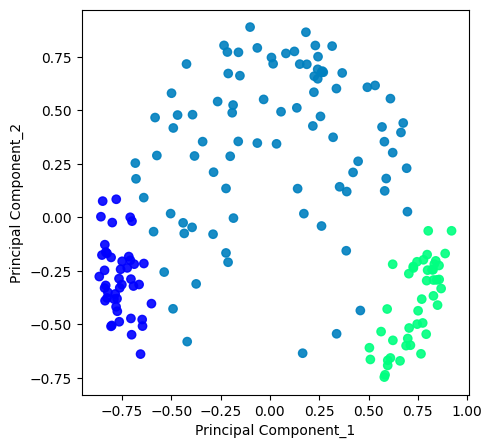

In [42]:
# Visualizing the clustering
fig = plt.figure(figsize=(5,5))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = GaussianMixture(n_components = 3).fit_predict(X_principal), cmap =plt.cm.winter, alpha = 0.9)
plt.xlabel("Principal Component_1")
plt.ylabel("Principal Component_2")
plt.show()

In [43]:
import time
from sklearn.mixture import GaussianMixture

# Load and preprocess your data

# Instantiate the GMM model
gmm = GaussianMixture(n_components=3)

# Measure execution time
start_time = time.time()
gmm.fit(ds)
end_time = time.time()

execution_time4 = end_time - start_time
print(f"Execution time: {execution_time4} seconds")


Execution time: 0.02755117416381836 seconds


In [63]:
import time
from sklearn.mixture import GaussianMixture

# Load and preprocess your data

# Instantiate the GMM model
gmm = GaussianMixture(n_components=3)

# Measure execution time
start_time = time.time()
gmm.fit(ds)
end_time = time.time()

accuracy4 = end_time - start_time
print(f"accuracy time: {accuracy4} seconds")


accuracy time: 0.07091379165649414 seconds


# DBSCAN

## Importing the required libraries

In [44]:


from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

## Preprocessing the data

In [45]:
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
df_scaled = scaler.fit_transform(ds)

# Normalizing the data so that
# the data approximately follows a Gaussian distribution
df_normalized = normalize(df_scaled)

# Converting the numpy array into a pandas DataFrame
df_normalized = pd.DataFrame(df_normalized)


## Reducing the dimensionality of the data to make it visualizable

In [46]:
pca = PCA(n_components = 2)
df_principal = pca.fit_transform(df_normalized)
df_principal = pd.DataFrame(df_principal)
df_principal.columns = ['P1', 'P2']
print(df_principal.head())


         P1        P2
0 -0.832433 -0.318834
1 -0.639443  0.091947
2 -0.756882 -0.243317
3 -0.805447 -0.510057
4 -0.373903 -0.311604


## Building the clustering model

In [47]:
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.0475, min_samples = 6).fit(df_principal)
labels = db_default.labels_

## Visualizing the clustering

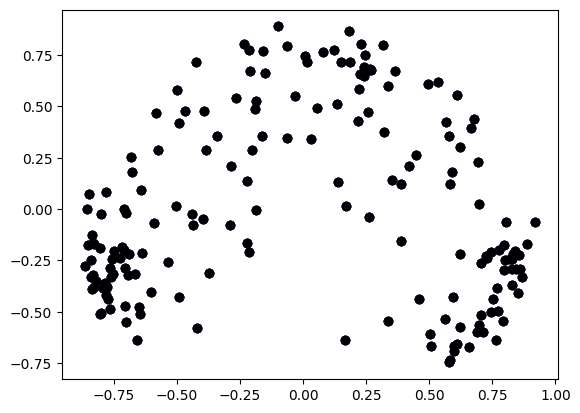

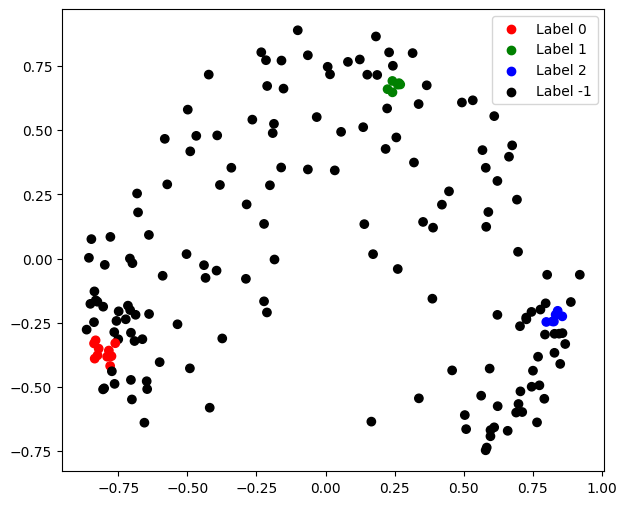

In [48]:
# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

# Building the colour vector for each data point
cvec = [colours[label] for label in labels]

# For the construction of the legend of the plot
r = plt.scatter(df_principal['P1'], df_principal['P2'], color ='r');
g = plt.scatter(df_principal['P1'], df_principal['P2'], color ='g');
b = plt.scatter(df_principal['P1'], df_principal['P2'], color ='b');
k = plt.scatter(df_principal['P1'], df_principal['P2'], color ='k');

# Plotting P1 on the X-Axis and P2 on the Y-Axis
# according to the colour vector defined
plt.figure(figsize =(7, 6))
plt.scatter(df_principal['P1'], df_principal['P2'], c = cvec)

# Building the legend
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))

plt.show()

## Tuning the parameters of the model

In [49]:
db = DBSCAN(eps = 0.0475, min_samples = 30).fit(df_principal)
labels1 = db.labels_

## Visualizing the changes

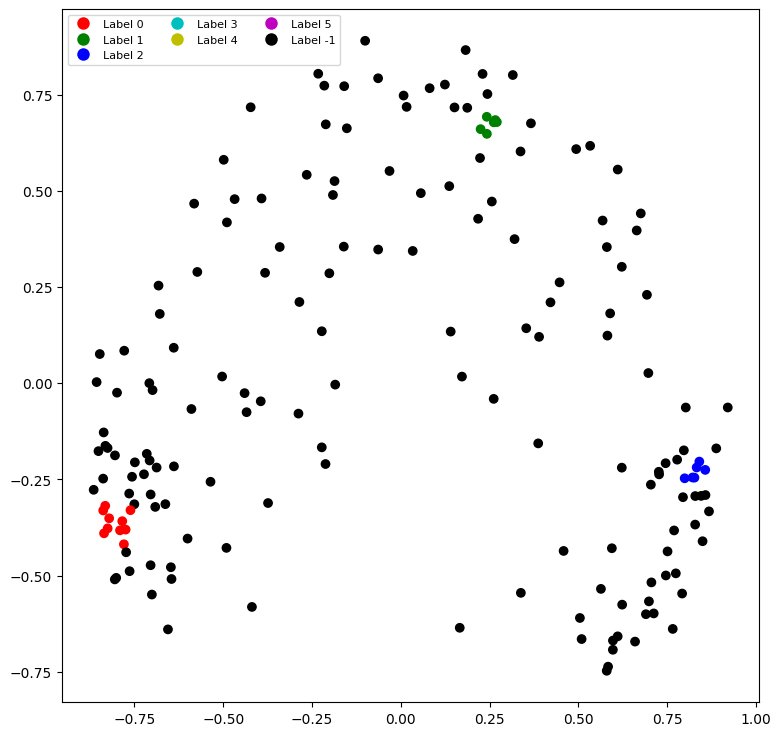

In [50]:
colours1 = {
    0: 'r',
    1: 'g',
    2: 'b',
    3: 'c',
    4: 'y',
    5: 'm',
    -1: 'k'
}

cvec = [colours1[label] for label in labels]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k']

# Create a scatter plot based on the color vector
plt.figure(figsize=(9, 9))
scatter = plt.scatter(df_principal['P1'], df_principal['P2'], c=cvec)

# Building the legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
labels = ['Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1']

plt.legend(handles, labels, scatterpoints=1, loc='upper left', ncol=3, fontsize=8)
plt.show()

In [51]:
import time
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# Load or generate your data
data, labels = make_blobs(n_samples=178, n_features=13, centers=3, random_state=0)

# Instantiate the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Measure execution time
start_time = time.time()
dbscan.fit(data)
end_time = time.time()

execution_time3 = end_time - start_time
print(f"Execution time: {execution_time3} seconds")


Execution time: 0.003528594970703125 seconds


In [62]:
import time
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# Load or generate your data
data, labels = make_blobs(n_samples=178, n_features=13, centers=3, random_state=0)

# Instantiate the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Measure execution time
start_time = time.time()
dbscan.fit(data)
end_time = time.time()

accuracy3 = end_time - start_time
print(f"accuracy time: {accuracy3} seconds")


accuracy time: 0.007461071014404297 seconds


## Hierarchical Clustering with dendrogram

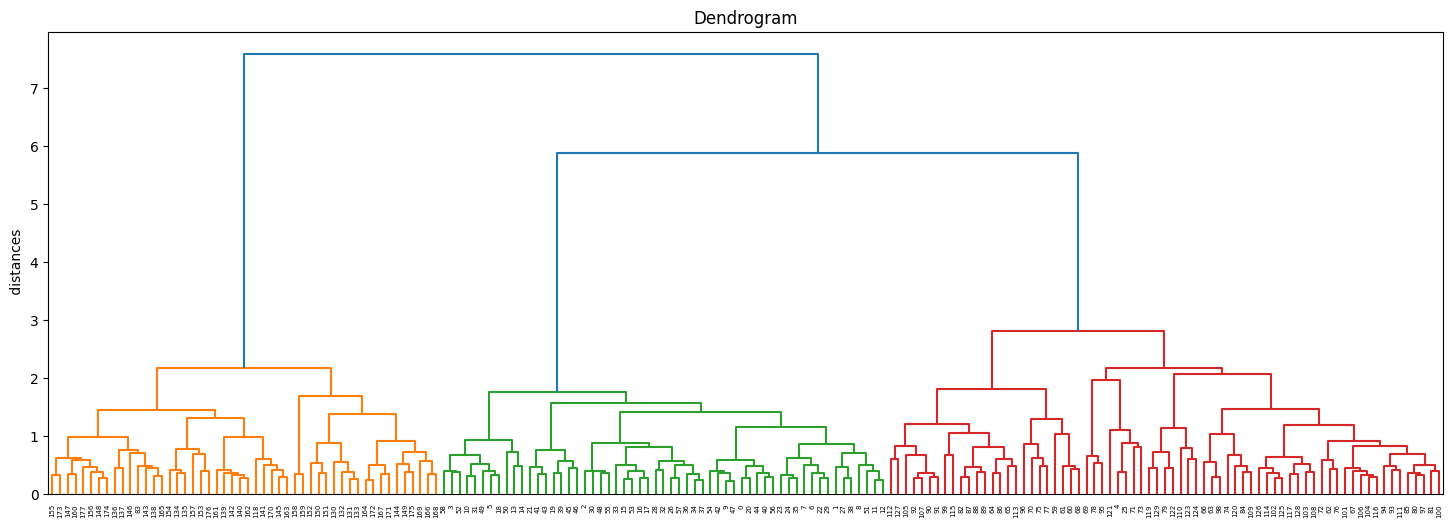

In [52]:
# Plotting a dendrogram
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot
pyplot.figure(figsize=(18, 6))
dendrogram = sch.dendrogram(sch.linkage(ds, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel(' distances')
plt.show()

In [53]:
from scipy.cluster.hierarchy import linkage,dendrogram

In [54]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import time

# Create a sample dataset (replace this with your actual data)
data = np.random.rand(100, 2)

# Start measuring the execution time
start_time = time.time()

# Perform hierarchical clustering
linkage_matrix = linkage(data, method='ward')

# End measuring the execution time
end_time = time.time()

# Calculate the execution time in seconds
execution_time1 = end_time - start_time
print(f"Execution time: {execution_time1} seconds")


Execution time: 0.0017271041870117188 seconds


In [55]:
print("Hierarchial Clustering : ",execution_time1)
print("Kmeans Clustering : ",execution_time2)
print("Dbscan Clustering : ",execution_time3)
print("Gaussian Clustering: ", execution_time4)

Hierarchial Clustering :  0.0017271041870117188
Kmeans Clustering :  0.022603750228881836
Dbscan Clustering :  0.003528594970703125
Gaussian Clustering:  0.02755117416381836


In [61]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import time

# Create a sample dataset (replace this with your actual data)
data = np.random.rand(100, 2)

# Start measuring the execution time
start_time = time.time()

# Perform hierarchical clustering
linkage_matrix = linkage(data, method='ward')

# End measuring the execution time
end_time = time.time()

# Calculate the execution time in seconds
accuracy1 = end_time - start_time
print(f"accuracy time: {accuracy1} seconds")




accuracy time: 0.0009970664978027344 seconds
